In [143]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load the datasets
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [144]:
# Identify missing values per column
missing_values = train_df.isnull().sum()
print("Missing values in each column:\n", missing_values)
# Identify missing values per column
missing_values = test_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
Missing values in each column:
 PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [145]:

# Fill missing values in categorical columns with the mode
for column in ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']:
    train_df[column].fillna(train_df[column].mode()[0], inplace=True)

# Fill missing values in numerical columns with the median
for column in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    train_df[column].fillna(train_df[column].median(), inplace=True)
    

# Fill missing values in categorical columns with the mode
for column in ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']:
    test_df[column].fillna(test_df[column].mode()[0], inplace=True)

# Fill missing values in numerical columns with the median
for column in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    test_df[column].fillna(test_df[column].median(), inplace=True)

In [146]:
# Identify missing values per column
missing_values = train_df.isnull().sum()
print("Missing values in each column:\n", missing_values)
# Identify missing values per column
missing_values = test_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64
Missing values in each column:
 PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64


### Cabin

In [147]:
# Function to split Cabin into Deck, Num, and Side
def split_cabin(cabin):
    if pd.isna(cabin):
        return None, None, None
    parts = cabin.split('/')
    return parts[0], parts[1], parts[2]

# Apply the function to train and test datasets
train_df[['Deck', 'Num', 'Side']] = train_df['Cabin'].apply(lambda x: pd.Series(split_cabin(x)))
test_df[['Deck', 'Num', 'Side']] = test_df['Cabin'].apply(lambda x: pd.Series(split_cabin(x)))

# Convert Side to binary
side_map = {'P': 0, 'S': 1}
train_df['Side'] = train_df['Side'].map(side_map)
test_df['Side'] = test_df['Side'].map(side_map)


### PassengerId

In [148]:
# Extract group and individual numbers from PassengerId
train_df[['Group', 'Individual']] = train_df['PassengerId'].str.split('_', expand=True)
test_df[['Group', 'Individual']] = test_df['PassengerId'].str.split('_', expand=True)
train_df['Group'] = pd.to_numeric(train_df['Group'])
test_df['Group'] = pd.to_numeric(test_df['Group'])
train_df['Individual'] = pd.to_numeric(train_df['Individual'])
test_df['Individual'] = pd.to_numeric(test_df['Individual'])


### Name

In [149]:
def extract_last_name(name):
    return name.split(' ')[0]

# Apply the function to extract last names for train and test datasets
train_df['LastName'] = train_df['Name'].apply(extract_last_name)
test_df['LastName'] = test_df['Name'].apply(extract_last_name)

# Count the number of relatives as the occurrence of last names
relatives_train = train_df['LastName'].value_counts()
relatives_test = test_df['LastName'].value_counts()

# Map the relatives counts back to the dataframes
train_df['NumRelatives'] = train_df['LastName'].map(relatives_train)-1
test_df['NumRelatives'] = test_df['LastName'].map(relatives_test)-1



### Age 



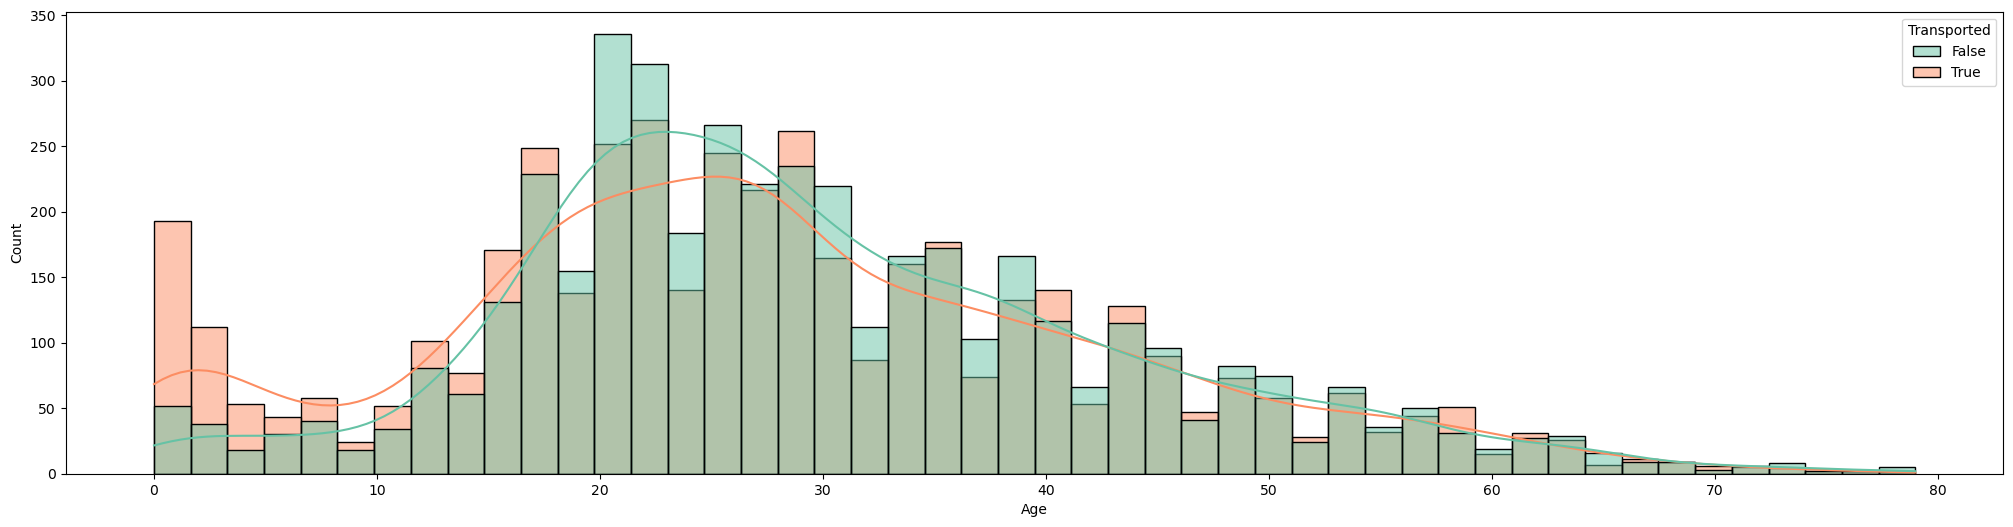

In [150]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(25,6))
sns.histplot(x=train_df['Age'],data=train_df, kde=True, hue='Transported', palette="Set2")
plt.show()

#### on a fait la remarque que tous les enfants(Age<12) avec un numrelatives egal a 0 sont tous  transporte 

In [151]:

# Feature Engineering
train_df['Under12'] = train_df['Age'] < 12
train_df['Under12With0Relatives'] = (train_df['Age'] < 12) & (train_df['NumRelatives'] == 0)


# Feature Engineering
test_df['Under12'] = test_df['Age'] < 12
test_df['Under12With0Relatives'] = (test_df['Age'] < 12) & (test_df['NumRelatives'] == 0)

# Convert boolean columns to int (True to 1, False to 0)
test_df['Under12'] = test_df['Under12'].astype(int)
test_df['Under12With0Relatives'] = test_df['Under12With0Relatives'].astype(int)

# Convert boolean columns to int (True to 1, False to 0)
train_df['Under12'] = train_df['Under12'].astype(int)
train_df['Under12With0Relatives'] = train_df['Under12With0Relatives'].astype(int)

In [152]:
# One-hot encode categorical features
train_df = pd.get_dummies(train_df, columns=['HomePlanet', 'Destination', 'Deck'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['HomePlanet', 'Destination', 'Deck'], drop_first=True)

# Assuming 'df' is your DataFrame
bool_cols = train_df.select_dtypes(include='bool').columns
train_df[bool_cols] = train_df[bool_cols].astype(int)
# Assuming 'df' is your DataFrame
bool_cols = test_df.select_dtypes(include='bool').columns
test_df[bool_cols] = test_df[bool_cols].astype(int)

In [153]:
# Now you can drop the 'Name' and 'LastName' columns if you want
train_df.drop(columns=['Name', 'LastName'], inplace=True)
test_df.drop(columns=['Name', 'LastName'], inplace=True)

# Continue with your machine learning pipeline after this...
#sdf

# Align the train and test dataframes by the columns
X_train = train_df.drop(columns=['PassengerId',  'Transported', 'Cabin'])
y_train = train_df['Transported']
X_test = test_df.drop(columns=['PassengerId','Cabin'])

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)



### Test Student

In [154]:
from scipy import stats

# Student t test pour les variables continues 
transported_true = train_df[train_df['Transported'] == True]
transported_false = train_df[train_df['Transported'] == False]

# Appliquer le test t de Student pour chaque colonne numérique
for column in train_df.select_dtypes(include=['float64', 'int64']).columns:
    # Assurez-vous de ne pas inclure la colonne 'Transported' dans le test
    if column != 'Transported':
        # Effectuer le test t de Student
        t_stat, p_val = stats.ttest_ind(transported_true[column].dropna(), transported_false[column].dropna(), equal_var=False)
        
        # Imprimer les résultats
        print(f"Colonne : {column}")
        print(f"Statistique t : {t_stat}, P-value : {p_val}\n")


Colonne : Age
Statistique t : -6.944551804501377, P-value : 4.071540314149144e-12

Colonne : RoomService
Statistique t : -23.02493292680715, P-value : 9.842247352608913e-112

Colonne : FoodCourt
Statistique t : 4.267593484183477, P-value : 2.000760720858698e-05

Colonne : ShoppingMall
Statistique t : 0.8782326731431734, P-value : 0.3798458890598879

Colonne : Spa
Statistique t : -20.736222276639285, P-value : 2.3899588509361637e-91

Colonne : VRDeck
Statistique t : -19.381868683920615, P-value : 1.6277903146720255e-80

Colonne : Side
Statistique t : 9.501349559035036, P-value : 2.628771562821824e-21

Colonne : Group
Statistique t : 2.0033137348020444, P-value : 0.045174725412235044

Colonne : Individual
Statistique t : 6.206166217331221, P-value : 5.678518392355681e-10

Colonne : NumRelatives
Statistique t : -0.7873299171461796, P-value : 0.43111023556781725



### CHI 2 test

In [155]:
from scipy.stats import chi2_contingency

# Appliquer le test du Chi-deux pour chaque variable catégorielle
for column in train_df.select_dtypes(include=['object', 'category']).columns:
    # Assurez-vous de ne pas inclure la variable 'Transported'
    if column != 'Transported':
        # Créer le tableau de contingence
        contingency_table = pd.crosstab(train_df[column], train_df['Transported'])

        # Effectuer le test du Chi-deux
        chi2, p_val, dof, expected = chi2_contingency(contingency_table)

        # Imprimer les résultats
        print(f"Variable : {column}")
        print(f"Chi2 Statistique : {chi2}, P-value : {p_val}\n")


Variable : PassengerId
Chi2 Statistique : 8693.000000000002, P-value : 0.49495731665065185

Variable : Cabin
Chi2 Statistique : 6849.431812445361, P-value : 0.006121140153794818

Variable : Num
Chi2 Statistique : 1995.3910213730715, P-value : 0.001896418609624204



### ridge Regression 

In [156]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import numpy as np

# Define a sequence of alphas to search over
alphas = np.logspace(-1, 1, 100)  
# Create a pipeline with a scaler and the Ridge Classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', RidgeClassifier())
])

# Define a grid of hyperparameters to search over
param_grid = {
    'ridge__alpha': alphas,   # Regularization strength
    'ridge__solver': ['auto']
}

# Initialize GridSearchCV with the parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_ridge = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict using the best estimator
ridge_predictions = best_ridge.predict(X_test)


# Convert numerical predictions to boolean
ridge_predictions_bool = ridge_predictions == 1

# Prepare the submission file for Ridge Regression
submission_ridge = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Transported': ridge_predictions_bool})
submission_ridge.to_csv('submission_ridge.csv', index=False)

# Output the best parameters found
print('Best parameters for Ridge Regression:', best_params)

Best parameters for Ridge Regression: {'ridge__alpha': 0.1, 'ridge__solver': 'auto'}


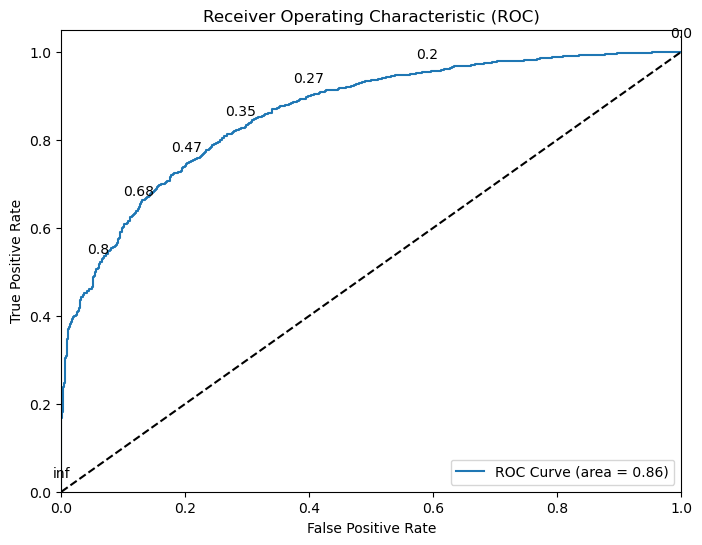

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train and y_train are your full dataset and labels
# Ensure there's a separate validation set if X_train_split and y_train_split were used for prefitting
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

ridge_clf = RidgeClassifier()
ridge_clf.fit(X_train_split, y_train_split)

# Use separate validation data here if necessary
calibrated_clf = CalibratedClassifierCV(estimator=ridge_clf, method='sigmoid', cv='prefit')
calibrated_clf.fit(X_test_split, y_test_split)  # Use separate validation data or test split


# Use predict_proba to get probabilities on the test subset
probabilities = calibrated_clf.predict_proba(X_test_split)

# Calculate the ROC Curve metrics using probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test_split, probabilities[:, 1])

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Annotate selected probability thresholds
indices_to_annotate = np.round(np.linspace(0, len(thresholds) - 1, 8)).astype(int)
for i in indices_to_annotate:
    plt.annotate(np.round(thresholds[i], 2), (fpr[i], tpr[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


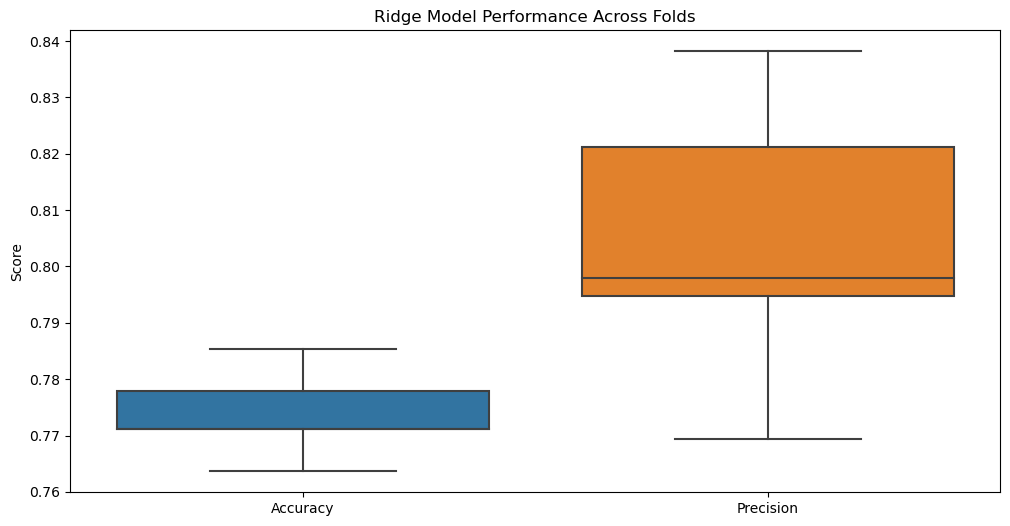

In [171]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score
import numpy as np

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)
accuracy_scores = []
precision_scores = []

for train_index, test_index in skf.split(X_train, y_train):

    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # The rest of your code remains the same...

    
    # Fit the model on the train fold
    model = RidgeClassifier()
    model.fit(X_train_fold, y_train_fold)
    
    # Predict on the test fold
    y_pred = model.predict(X_test_fold)
    
    # Calculate and store the accuracy and precision
    accuracy_scores.append(accuracy_score(y_test_fold, y_pred))
    precision_scores.append(precision_score(y_test_fold, y_pred))

# Use accuracy_scores and precision_scores as needed
import seaborn as sns

# Combine the scores into a single DataFrame
scores_df = pd.DataFrame({'Accuracy': accuracy_scores, 'Precision': precision_scores})

# Plot boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=scores_df)
plt.title('Ridge Model Performance Across Folds')
plt.ylabel('Score')
plt.show()


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define a pipeline with a scaler and the logistic regression classifier
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(penalty='l2', solver='saga', max_iter=10000, random_state=42))
])

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(penalty='l1', solver='saga', max_iter=10000, random_state=42))
])

# Define a range of alphas (equivalent to the inverse of the regularization strength)
alphas =np.logspace(-4, 4, 20) 

# Initialize GridSearchCV with the parameter grid for Ridge
ridge_grid_search = GridSearchCV(ridge_pipeline, {'logistic__C': alphas}, cv=5, scoring='accuracy', n_jobs=-1)
# Fit the model for Ridge
ridge_grid_search.fit(X_train, y_train)

# Initialize GridSearchCV with the parameter grid for Lasso
lasso_grid_search = GridSearchCV(lasso_pipeline, {'logistic__C': alphas}, cv=5, scoring='accuracy', n_jobs=-1)
# Fit the model for Lasso
lasso_grid_search.fit(X_train, y_train)

# Predict using the best estimator for Ridge
ridge_predictions = ridge_grid_search.best_estimator_.predict(X_test)
ridge_predictions= ridge_predictions==1
# Prepare the submission file for Ridge Regression
submission_ridge = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Transported': ridge_predictions})
submission_ridge.to_csv('submission_ridge2.csv', index=False)

# Predict using the best estimator for Lasso
lasso_predictions = lasso_grid_search.best_estimator_.predict(X_test)
lasso_predictions =lasso_predictions==1
# Prepare the submission file for Lasso Regression
submission_lasso = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Transported': lasso_predictions})
submission_lasso.to_csv('submission_lasso.csv', index=False)

# Output the best parameters found for Ridge and Lasso
print('Best parameters for Ridge Regression:', ridge_grid_search.best_params_)
print('Best parameters for Lasso Regression:', lasso_grid_search.best_params_)


Best parameters for Ridge Regression: {'logistic__C': 0.23357214690901212}
Best parameters for Lasso Regression: {'logistic__C': 0.03359818286283781}


### DTC Classifier

### GBM

In [122]:
# Initialize the GBM with default parameters
gbm_default = Pipeline([
    ('scaler', StandardScaler()),
    ('gbm', GradientBoostingClassifier(random_state=42))
])

# Fit the GBM model to the training data
gbm_default.fit(X_train, y_train)

# Predict on the test set using the default GBM model
predictions = gbm_default.predict(X_test)

predictions= predictions==1
# Create submission dataframe
submission_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Transported': predictions
})

# Save the submission to a CSV file
submission_df.to_csv('data/submission_gbm.csv', index=False)

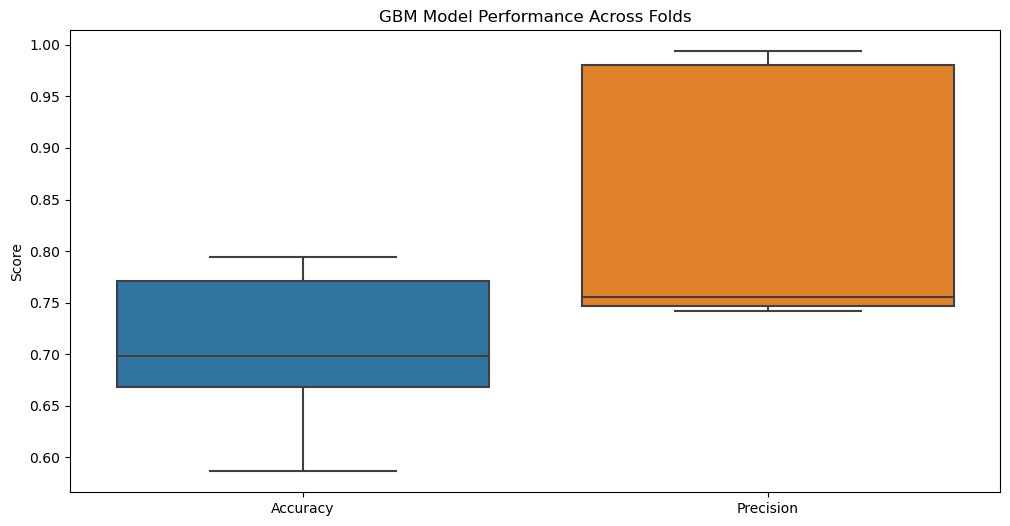

In [172]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score
import numpy as np

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)
accuracy_scores = []
precision_scores = []

for train_index, test_index in skf.split(X_train, y_train):

    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # The rest of your code remains the same...

    
    gbm_default = Pipeline([
    ('scaler', StandardScaler()),
    ('gbm', GradientBoostingClassifier(random_state=42))
    ])

    # Fit the GBM model to the training data
    gbm_default.fit(X_train_fold, y_train_fold)

    # Predict on the test set using the default GBM model
    predictions = gbm_default.predict(X_test_fold)

    y_pred = predictions
    
    # Calculate and store the accuracy and precision
    accuracy_scores.append(accuracy_score(y_test_fold, y_pred))
    precision_scores.append(precision_score(y_test_fold, y_pred))

# Use accuracy_scores and precision_scores as needed
import seaborn as sns

# Combine the scores into a single DataFrame
scores_df = pd.DataFrame({'Accuracy': accuracy_scores, 'Precision': precision_scores})

# Plot boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=scores_df)
plt.title('GBM Model Performance Across Folds')
plt.ylabel('Score')
plt.show()


### SVM

In [118]:
from sklearn.svm import SVC


# Initialize the SVM with default parameters
svm_default = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])

# Fit the SVM model to the training data
svm_default.fit(X_train, y_train)

# Predict on the test set using the default SVM model
svm_predictions = svm_default.predict(X_test)
svm_predictions=svm_predictions==1
# Create submission dataframe for SVM
submission_svm_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Transported': svm_predictions
})

# Save the submission to a CSV file for SVM
submission_svm_df.to_csv('data/submission_svm.csv', index=False)


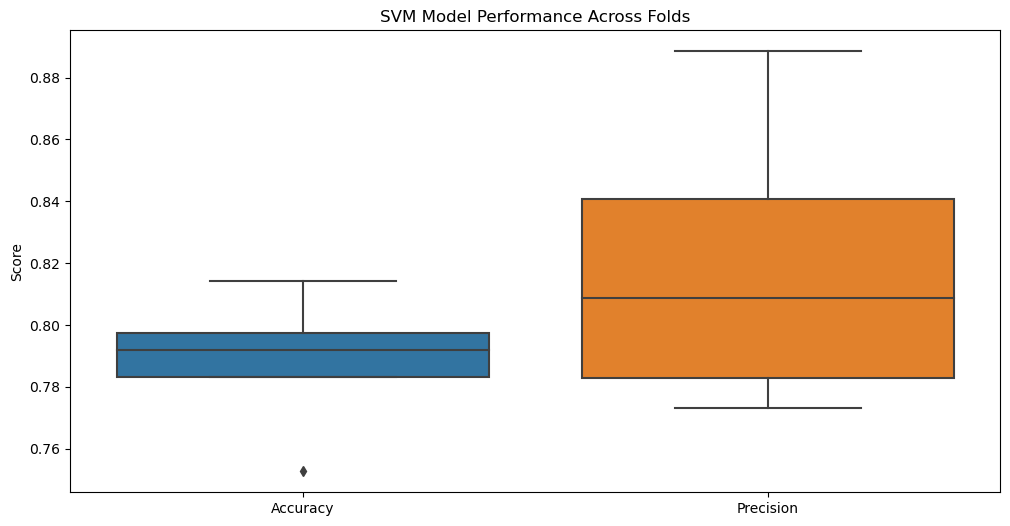

In [173]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score
import numpy as np

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)
accuracy_scores = []
precision_scores = []

for train_index, test_index in skf.split(X_train, y_train):

    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # The rest of your code remains the same...

    
    
    # Initialize the SVM with default parameters
    svm_default = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(random_state=42))
    ])

    # Fit the SVM model to the training data
    svm_default.fit(X_train_fold, y_train_fold)

    # Predict on the test set using the default SVM model
    svm_predictions = svm_default.predict(X_test_fold)

    y_pred = svm_predictions
    
    # Calculate and store the accuracy and precision
    accuracy_scores.append(accuracy_score(y_test_fold, y_pred))
    precision_scores.append(precision_score(y_test_fold, y_pred))

# Use accuracy_scores and precision_scores as needed
import seaborn as sns

# Combine the scores into a single DataFrame
scores_df = pd.DataFrame({'Accuracy': accuracy_scores, 'Precision': precision_scores})

# Plot boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=scores_df)
plt.title('SVM Model Performance Across Folds')
plt.ylabel('Score')
plt.show()

### random forest

In [119]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest with default parameters
rf_default = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Fit the RF model to the training data
rf_default.fit(X_train, y_train)

# Predict on the test set using the default RF model
rf_predictions = rf_default.predict(X_test)
rf_predictions=rf_predictions==1
# Create submission dataframe for RF
submission_rf_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Transported': rf_predictions
})

# Save the submission to a CSV file for RF
submission_rf_df.to_csv('data/submission_rf.csv', index=False)


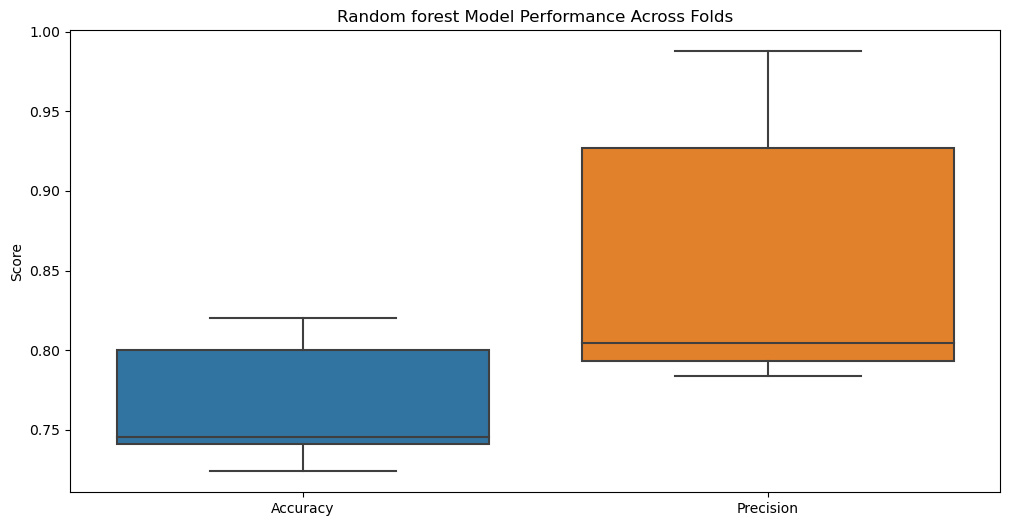

In [174]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score
import numpy as np

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)
accuracy_scores = []
precision_scores = []

for train_index, test_index in skf.split(X_train, y_train):

    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # The rest of your code remains the same...

    
    
       # Initialize the Random Forest with default parameters
    rf_default = Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier(random_state=42))
    ])

    # Fit the RF model to the training data
    rf_default.fit(X_train_fold, y_train_fold)

    # Predict on the test set using the default RF model
    rf_predictions = rf_default.predict(X_test_fold)

    y_pred = rf_predictions
    
    # Calculate and store the accuracy and precision
    accuracy_scores.append(accuracy_score(y_test_fold, y_pred))
    precision_scores.append(precision_score(y_test_fold, y_pred))

# Use accuracy_scores and precision_scores as needed
import seaborn as sns

# Combine the scores into a single DataFrame
scores_df = pd.DataFrame({'Accuracy': accuracy_scores, 'Precision': precision_scores})

# Plot boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=scores_df)
plt.title('Random forest Model Performance Across Folds')
plt.ylabel('Score')
plt.show()

### DTC

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



# Create a pipeline with a scaler and the Decision Tree Classifier
dtc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dtc', DecisionTreeClassifier(random_state=42))
])

# Define a grid of hyperparameters to search over
# Note: It's unusual to scale features for decision trees, but it's here for pipeline consistency
param_grid_dtc = {
    'dtc__criterion': ['gini', 'entropy'],
    'dtc__splitter': ['best', 'random'],
    'dtc__max_depth': [None, 10, 20, 30, 40, 50],
    'dtc__min_samples_split': [2, 5, 10],
    'dtc__min_samples_leaf': [1, 2, 4],
    'dtc__max_features': [None, 'auto', 'sqrt', 'log2'],
    'dtc__max_leaf_nodes': [None, 10, 20, 30, 40, 50]
}

# Initialize GridSearchCV with the parameter grid
dtc_grid_search = GridSearchCV(dtc_pipeline, param_grid_dtc, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
dtc_grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_dtc = dtc_grid_search.best_estimator_
best_params_dtc = dtc_grid_search.best_params_

# Predict using the best estimator
dtc_predictions = best_dtc.predict(X_test)

# Prepare the submission file for Decision Tree Classifier
submission_dtc = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Transported': dtc_predictions})
submission_dtc.to_csv('submission_dtc.csv', index=False)

# Output the best parameters found
print('Best parameters for Decision Tree Classifier:', best_params_dtc)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
6480 fits failed out of a total of 25920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4054 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estima

Best parameters for Decision Tree Classifier: {'dtc__criterion': 'gini', 'dtc__max_depth': 10, 'dtc__max_features': None, 'dtc__max_leaf_nodes': 50, 'dtc__min_samples_leaf': 1, 'dtc__min_samples_split': 2, 'dtc__splitter': 'random'}


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.66859437 0.71828128 0.68159644 ... 0.71241412 0.70665753 0.71736008]
  warnings.warn(


In [126]:
from sklearn.model_selection import RandomizedSearchCV
# Create a pipeline with a scaler and the Decision Tree Classifier
dtc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dtc', DecisionTreeClassifier(random_state=42))
])
param_grid_dtc = {
    'dtc__criterion': ['gini', 'entropy'],
    'dtc__splitter': ['best', 'random'],
    'dtc__max_depth': [None, 10, 20, 30, 40, 50],
    'dtc__min_samples_split': [2, 5, 10],
    'dtc__min_samples_leaf': [1, 2, 4],
    'dtc__max_features': [None,'auto', 'sqrt', 'log2'],
    'dtc__max_leaf_nodes': [None, 10, 20, 30, 40, 50]
}
# Initialize RandomizedSearchCV with the parameter grid and a fixed number of iterations
dtc_random_search = RandomizedSearchCV(dtc_pipeline, param_grid_dtc, n_iter=100, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model
dtc_random_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_dtc = dtc_random_search.best_estimator_
best_params_dtc = dtc_random_search.best_params_

# Predict using the best estimator
dtc_predictions = best_dtc.predict(X_test)
dtc_predictions=dtc_predictions==1
# Prepare the submission file for Decision Tree Classifier
submission_dtc = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Transported': dtc_predictions})
submission_dtc.to_csv('submission_dtc.csv', index=False)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
69 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fi

In [170]:
train_df.columns


Index(['PassengerId', 'CryoSleep', 'Cabin', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Num',
       'Side', 'Group', 'Individual', 'NumRelatives', 'Under12',
       'Under12With0Relatives', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T'],
      dtype='object')